In [1]:
from haloflow.npe import valid as V
from haloflow.npe import plotting as P

In [2]:
train_sim = test_sim = 'Simba100'
obs = 'mags'

In [3]:
ranks, alpha, ecp, y_nde = V.validate_npe(train_obs=obs, train_sim=train_sim, test_obs=obs, test_sim=test_sim, version=1, data_dir='../../data/hf2/dann/npe', n_samples=1000)
ranks_eagle, alpha_eagle, ecp_eagle, y_nde_eagle = V.validate_npe(train_obs=obs, train_sim='Eagle100', test_obs=obs, test_sim=test_sim, version=1, data_dir='../../data/hf2/dann/npe', n_samples=1000)

1005 models trained
[594, 316, 732, 978, 915]


/opt/homebrew/Caskroom/miniforge/base/envs/haloflow/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


757 models trained
[538, 312, 163, 496, 746]


In [21]:
train_sim = test_sim = "TNG100"

from glob import glob
all_sims = ['TNG50', 'TNG100', 'Eagle100', 'Simba100']
rem_sims = '_'.join([s for s in all_sims if s != 'Simba100'])
fp = f'../../data/hf2/dann/models/dann_model_{rem_sims}_to_Simba100_{obs}_*.pt'
fp = glob(fp)[0]

ranks_dann, alpha_dann, ecp_dann, y_nde_dann = V.validate_npe(train_obs=obs, 
                                                              train_sim=train_sim, 
                                                              test_obs=obs, 
                                                              test_sim=test_sim, 
                                                              version=1, 
                                                              with_dann=True, 
                                                              data_dir='../../data/hf2/dann/npe', 
                                                              n_samples=1000, 
                                                              fp=fp)

50 models trained
[21, 28, 40, 44, 5]


In [22]:
ranks_dann2, alpha_dann2, ecp_dann2, y_nde_dann2 = V.validate_npe(train_obs=obs, 
                                                              train_sim=train_sim, 
                                                              test_obs=obs, 
                                                              test_sim='Simba100', 
                                                              version=1, 
                                                              with_dann=True, 
                                                              data_dir='../../data/hf2/dann/npe', 
                                                              n_samples=1000, 
                                                              fp=fp)

50 models trained
[21, 28, 40, 44, 5]


Text(0.05, 0.95, '$\\rm{M}_{\\rm h}$')

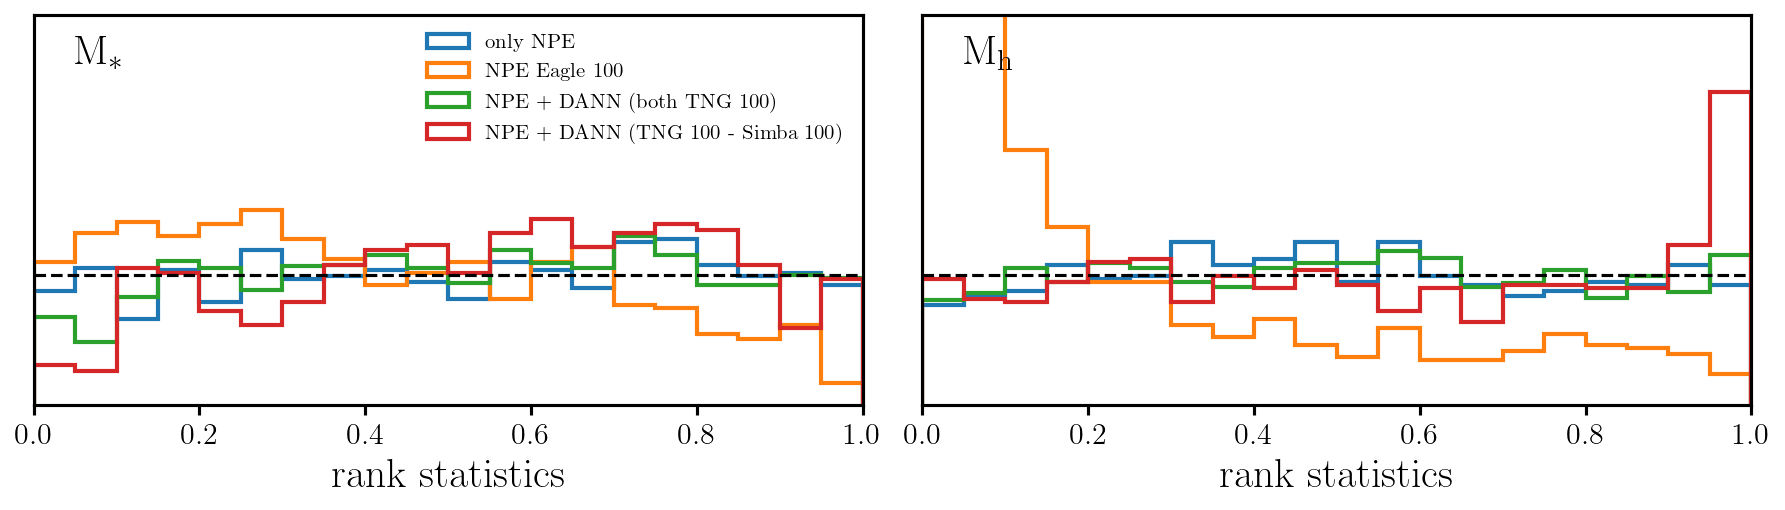

In [23]:
fig = P.plot_rank_statistics([ranks, ranks_eagle, ranks_dann, ranks_dann2], 
                             labels=['only NPE', 'NPE Eagle 100', 'NPE + DANN (both TNG 100)', 'NPE + DANN (TNG 100 - Simba 100)'],)

# add text to the axes
fig.axes[0].text(0.05, 0.95, r'$\rm{M}_{*}$', fontsize=20, transform=fig.axes[0].transAxes, ha='left', va='top')
fig.axes[1].text(0.05, 0.95, r'$\rm{M}_{\rm h}$', fontsize=20, transform=fig.axes[1].transAxes, ha='left', va='top')

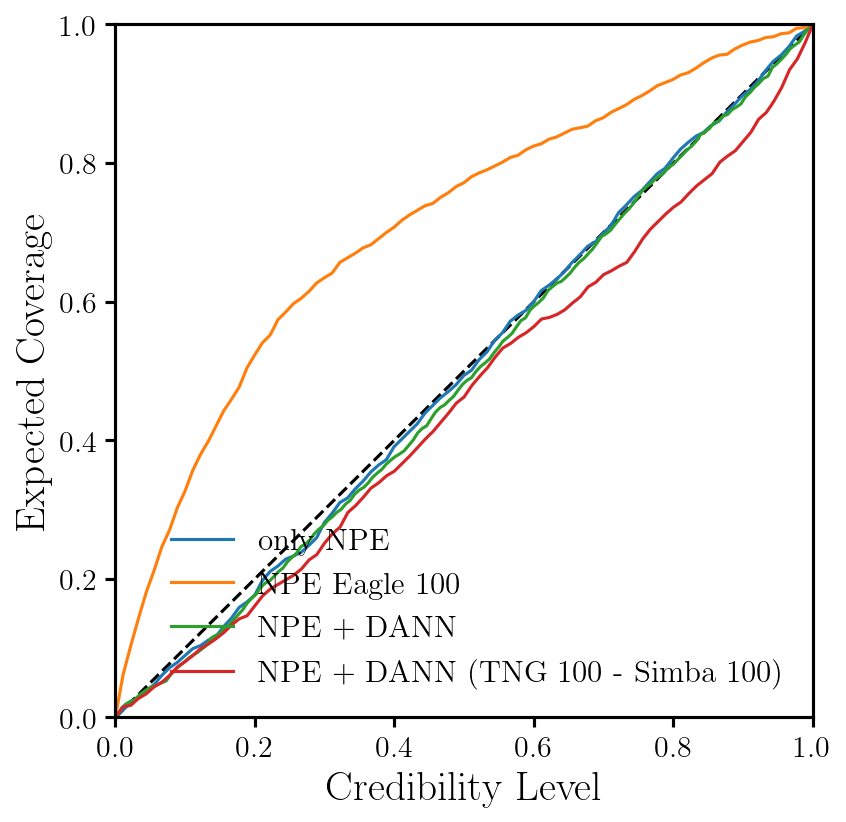

In [24]:
fig, ax = P.plot_coverage([alpha, alpha_eagle, alpha_dann, alpha_dann2], 
                          [ecp, ecp_eagle, ecp_dann, ecp_dann2], 
                          labels=['only NPE', 'NPE Eagle 100', 'NPE + DANN', 'NPE + DANN (TNG 100 - Simba 100)'],)

1005 models trained
[594, 316, 732, 978, 915]
757 models trained
[538, 312, 163, 496, 746]
106 models trained
[43, 36, 21, 41, 84]


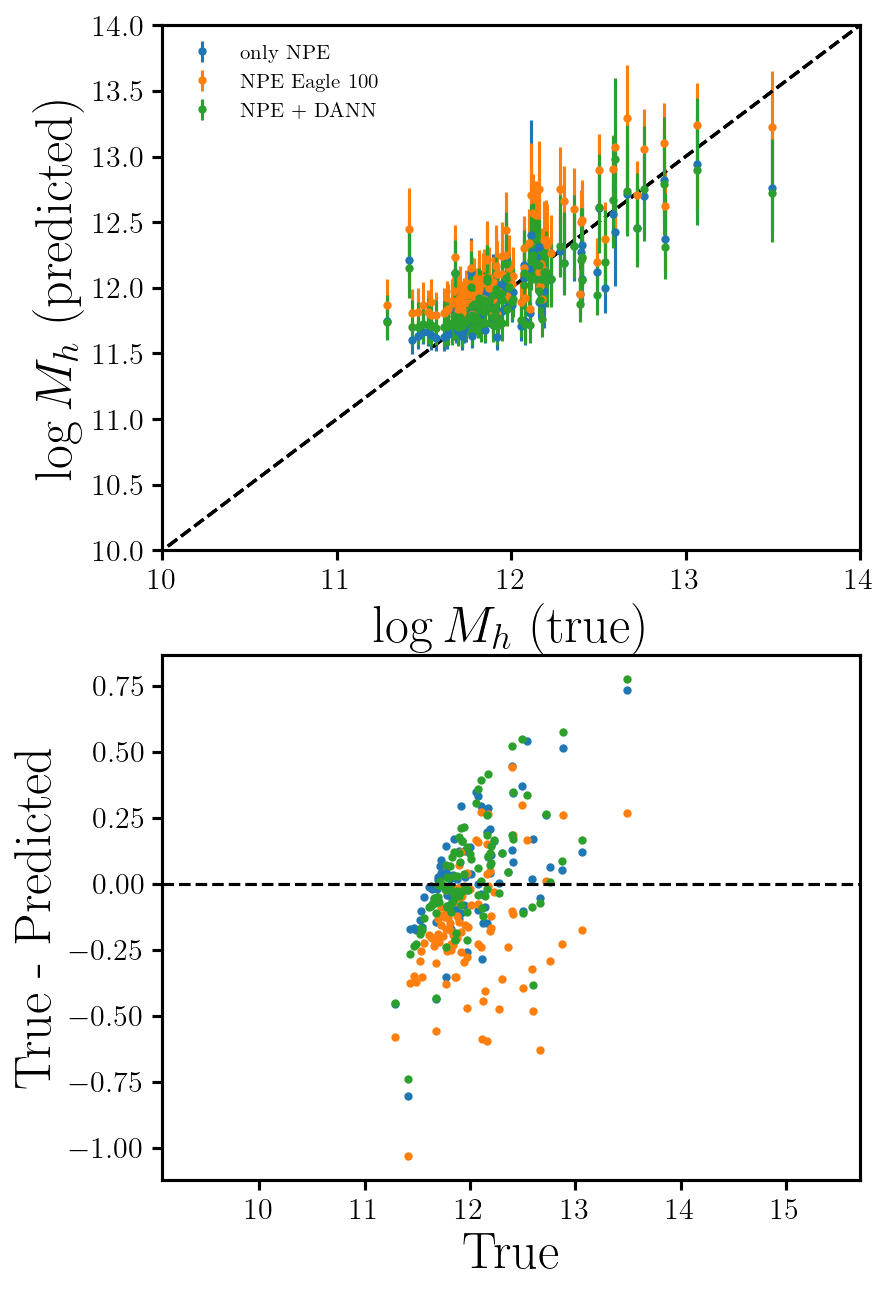

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 1, figsize=(6, 10), dpi=150)

ax[0], y_true, y_pred = P.plot_true_pred(
    ax[0],
    train_obs=obs,
    train_sim=train_sim,
    test_obs=obs,
    test_sim=test_sim,
    device='cpu',
    mass='halo',
    with_dann=False,
    data_dir='../../data/hf2/dann/npe'
)

ax[0], y_true_eg, y_pred_eg = P.plot_true_pred(
    ax[0],
    train_obs=obs,
    train_sim='Eagle100',
    test_obs=obs,
    test_sim=test_sim,
    device='cpu',
    mass='halo',
    with_dann=False,
    data_dir='../../data/hf2/dann/npe',
    fmt='.C1'
)

ax[0], y_true_dann, y_pred_dann = P.plot_true_pred(
    ax[0],
    train_obs=obs,
    train_sim=train_sim,
    test_obs=obs,
    test_sim=test_sim,
    device='cpu',
    mass='halo',
    with_dann=True,
    data_dir='../../data/hf2/dann/npe', 
    fp='../../data/hf2/dann/models/dann_model_TNG50_TNG100_Eagle100_to_Simba100_mags_lr0.001_bs32_e100_2025-03-05.pt',
    fmt='.C2'
)

y_nde_q0, y_nde_q1, y_nde_q2 = np.quantile(y_pred, (0.16, 0.5, 0.84), axis=1)
y_nde_eg_q0, y_nde_eg_q1, y_nde_eg_q2 = np.quantile(y_pred_eg, (0.16, 0.5, 0.84), axis=1)
y_nde_dann_q0, y_nde_dann_q1, y_nde_dann_q2 = np.quantile(y_pred_dann, (0.16, 0.5, 0.84), axis=1)

ax[0].legend(['only NPE', 'NPE Eagle 100', 'NPE + DANN'])

ax[1].plot(y_true[:, 1], y_true[:, 1] - y_nde_q1[:, 1], '.C0', label='only NPE')
ax[1].plot(y_true[:, 1], y_true[:, 1] - y_nde_eg_q1[:, 1], '.C1', label='NPE Eagle 100')
ax[1].plot(y_true[:, 1], y_true[:, 1] - y_nde_dann_q1[:, 1], '.C2', label='NPE + DANN')

# dashed lines at 0
ax[1].axhline(0, color='black', linestyle='--')
ax[1].set_xlabel('True', fontsize=25)
ax[1].set_ylabel('True - Predicted', fontsize=25)

plt.show()

In [15]:
# calculate the mean and standard deviation of the residuals
residuals = y_true[:, 1] - y_nde_q1[:, 1]
residuals_dann = y_true[:, 1] - y_nde_dann_q1[:, 1]
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)
mean_residuals_dann = np.mean(residuals_dann)
std_residuals_dann = np.std(residuals_dann)
print(f'only NPE: mean = {mean_residuals:.2f}, std = {std_residuals:.2f}')
print(f'NPE + DANN: mean = {mean_residuals_dann:.2f}, std = {std_residuals_dann:.2f}')

print(f'Difference in mean: {mean_residuals - mean_residuals_dann:.2f}')
print(f'Difference in std: {std_residuals - std_residuals_dann:.2f}')


only NPE: mean = 0.02, std = 0.21
NPE + DANN: mean = 0.02, std = 0.21
Difference in mean: -0.00
Difference in std: -0.01
